## *Automated Waste Sorting Enhancing Recycling Efficiency for Sustainable Development*

### Project description
Developing a Garbage Classification system utilizing Convolutional Neural Networks (CNNs) to accurately categorize waste into recyclable and non-recyclable categories based on image recognition. The system aims to contribute to waste management efforts by automating the sorting process, enhancing efficiency, and promoting recycling practices.

### Scenarios:
1. **Smart Waste Bins**: Implement the CNN model in smart waste bins equipped with cameras. As users dispose of their waste, the system automatically identifies and sorts items into appropriate recycling categories, streamlining the waste collection process.
   
2. **Educational Tools**: Integrate the CNN-based classification system into educational platforms. Users can upload images of various waste items to learn about proper sorting techniques, fostering environmental awareness and promoting responsible waste management practices.

### Task:
Develop and fine-tune the CNN architecture using a dataset of labeled garbage images, ensuring robust classification accuracy across a diverse range of waste items.

In [ ]:
!pip install -q kaggle


In [ ]:
!mkdir ~/.kaggle


In [ ]:
!cp kaggle.json ~/.kaggle


In [ ]:
! kaggle datasets download -d saumyamohandas/garbage-classification-image-dataset

 85% 37.0M/43.4M [00:00<00:00, 73.2MB/s]
100% 43.4M/43.4M [00:00<00:00, 56.2MB/s]


In [ ]:
!unzip /content/garbage-classification-image-dataset.zip

Archive:  /content/garbage-classification-image-dataset.zip
  inflating: dataset/Testing/cardboard/cardboard337.jpg  
  inflating: dataset/Testing/cardboard/cardboard338.jpg  
  inflating: dataset/Testing/cardboard/cardboard339.jpg  
  inflating: dataset/Testing/cardboard/cardboard340.jpg  
  inflating: dataset/Testing/cardboard/cardboard341.jpg  
  inflating: dataset/Testing/cardboard/cardboard342.jpg  
  inflating: dataset/Testing/cardboard/cardboard343.jpg  
  inflating: dataset/Testing/cardboard/cardboard344.jpg  
  inflating: dataset/Testing/cardboard/cardboard345.jpg  
  inflating: dataset/Testing/cardboard/cardboard346.jpg  
  inflating: dataset/Testing/cardboard/cardboard347.jpg  
  inflating: dataset/Testing/cardboard/cardboard348.jpg  
  inflating: dataset/Testing/cardboard/cardboard349.jpg  
  inflating: dataset/Testing/cardboard/cardboard350.jpg  
  inflating: dataset/Testing/cardboard/cardboard351.jpg  
  inflating: dataset/Testing/cardboard/cardboard352.jpg  
  inflating:

In [ ]:
import tensorflow as tf

# Importing libraries


In [ ]:
from keras.models import Sequential
from keras.layers import Convolution2D,Flatten,Dense,MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

## Data Augmentation

# Loading Images


In [ ]:
train_datagen=ImageDataGenerator(horizontal_flip=True,rescale=1./255,zoom_range=0.2)
#rescale=1./255 means transform every pixel value from range [0,255] -> [0,1].

In [ ]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
X_train=train_datagen.flow_from_directory("/content/dataset/Training",
                                          target_size=(128,128),
                                          batch_size=4)

Found 2508 images belonging to 6 classes.


In [ ]:
X_test=test_datagen.flow_from_directory("/content/dataset/Testing",
                                        target_size=(128,128),
                                        class_mode='categorical',
                                        batch_size=4)

Found 464 images belonging to 6 classes.


In [ ]:
X_train.class_indices

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}

# ModelBuilding

In [ ]:
model=Sequential()

In [ ]:
#1)convolution layer
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))

In [ ]:
#1)maxpooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
#2)convolution layer
model.add(Convolution2D(32,(3,3),activation='relu'))


In [ ]:
#2)maxpooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
#Flatten layer
model.add(Flatten())

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 28800)             0         
                                                                 
Total params: 10144 (39.62 KB)
Trainable params: 10144 (

In [ ]:
model.add(Dense(300,activation='relu'))#hidden layer
model.add(Dense(150,activation='relu'))#hidden layer
model.add(Dense(6,activation='softmax'))#output layer

In [ ]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])

In [ ]:
# training the model

model.fit_generator(X_train,
                    steps_per_epoch= len(X_train),
                    epochs = 30,
                    validation_data = X_test,
                    validation_steps = len(X_test))

<ipython-input-25-257d61359db9>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(X_train,


Epoch 1/30
627/627 [==============================] - 40s 46ms/step - loss: 1.7456 - accuracy: 0.2464 - val_loss: 1.6003 - val_accuracy: 0.3266
Epoch 2/30
627/627 [==============================] - 30s 47ms/step - loss: 1.6352 - accuracy: 0.3313 - val_loss: 1.5375 - val_accuracy: 0.3529
Epoch 3/30
627/627 [==============================] - 38s 60ms/step - loss: 1.4567 - accuracy: 0.4099 - val_loss: 1.3346 - val_accuracy: 0.4621
Epoch 4/30
627/627 [==============================] - 36s 58ms/step - loss: 1.3365 - accuracy: 0.4621 - val_loss: 1.2080 - val_accuracy: 0.5148
Epoch 5/30
627/627 [==============================] - 29s 46ms/step - loss: 1.2577 - accuracy: 0.5036 - val_loss: 1.1312 - val_accuracy: 0.5797
Epoch 6/30
627/627 [==============================] - 29s 46ms/step - loss: 1.1340 - accuracy: 0.5698 - val_loss: 1.0768 - val_accuracy: 0.5885
Epoch 7/30
627/627 [==============================] - 29s 46ms/step - loss: 1.0505 - accuracy: 0.6041 - val_loss: 1.0247 - val_accuracy:

In [ ]:
model.save('garbage.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Testing

In [ ]:
import numpy as np
from keras.preprocessing import image

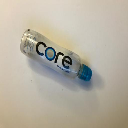

In [ ]:
# testing 1

img = image.load_img('/content/dataset/Testing/plastic/plastic266.jpg',target_size =(128,128))
img

In [ ]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred =np.argmax(model.predict(x))
op =['cardboard','glass','metal','paper','trash','plastic']
op[pred]

1/1 [==============================] - 0s 19ms/step


'plastic'

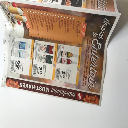

In [ ]:
# testing 2

img = image.load_img('/content/dataset/Testing/paper/paper481.jpg',target_size =(128,128))
img

In [ ]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred =np.argmax(model.predict(x))
op =['cardboard','glass','metal','paper','trash','plastic']
op[pred]

1/1 [==============================] - 0s 36ms/step


'paper'

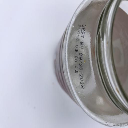

In [ ]:
# testing 3

img = image.load_img('/content/dataset/Testing/glass/glass400.jpg',target_size =(128,128))
img

In [ ]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred =np.argmax(model.predict(x))
op =['cardboard','glass','metal','paper','trash','plastic']
op[pred]

1/1 [==============================] - 0s 51ms/step


'glass'

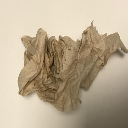

In [ ]:
# testing 4

img = image.load_img('/content/dataset/Training/trash/trash100.jpg',target_size =(128,128))
img

In [ ]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred =np.argmax(model.predict(x))
op =['cardboard','glass','metal','paper','trash','plastic']
op[pred]

1/1 [==============================] - 0s 28ms/step


'trash'

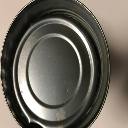

In [ ]:
# testing 5

img = image.load_img('/content/dataset/Testing/metal/metal20.jpg',target_size =(128,128))
img

In [ ]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred =np.argmax(model.predict(x))
op =['cardboard','glass','metal','paper','trash','plastic']
op[pred]

1/1 [==============================] - 0s 28ms/step


'metal'